In [ ]:
from mpl_toolkits.mplot3d import axis3d
from pandas import read_csv
from keras.models import Sequential

from  tensorflow.keras import optimizers  as opt
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [ ]:
df = read_csv("/content/drive/MyDrive/data_vibration.csv")
df.columns


Index(['Spacing, m', 'Burden,m', 'Depth, m', 'Max Charge per delay,kg',
       'Total Charge (kg)', 'Distance from blast site (m)',
       'Tran ppv Peak (mm/s)', 'tran f (\nhz)', 'Vert Peak ppv (mm/s)',
       'vert f (hz)', 'long peek ppv(mm/sec)', 'long (fz)', 'avg of ppv',
       'avg of f( hz)'],
      dtype='object')

In [ ]:

feature_names = ['Spacing, m', 'Burden,m', 'Depth, m', 'Max Charge per delay,kg',
       'Total Charge (kg)', 'Distance from blast site (m)',
       'Tran ppv Peak (mm/s)', 'tran f (\nhz)', 'Vert Peak ppv (mm/s)',
       'vert f (hz)', 'long peek ppv(mm/sec)', 'long (fz)', 'avg of ppv',
       'avg of f( hz)']
df.drop(['Spacing, m', 'Burden,m', 'Depth, m', 'Tran ppv Peak (mm/s)', 'tran f (\nhz)', 'Vert Peak ppv (mm/s)',
       'vert f (hz)', 'long peek ppv(mm/sec)', 'long (fz)','avg of f( hz)'], inplace=True, axis=1)
df.head

<bound method NDFrame.head of     Max Charge per delay,kg  Total Charge (kg)  Distance from blast site (m)  \
0                     49.21               3838                            50   
1                     49.21               3838                            60   
2                     49.21               3838                            50   
3                     58.80                980                            50   
4                     58.80                980                           120   
5                     53.10               4248                            50   
6                     53.10               4248                            50   
7                     52.87               4018                           110   
8                     52.87               4018                           120   
9                     52.87               4018                           120   
10                    48.67               1379                            50   
11        

In [ ]:
X = df.drop('avg of ppv', axis = 1)
y = df['avg of ppv']


In [ ]:
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [ ]:
# run once when restarting whole ann traning
df = df.reset_index()
print(y_test)

4     4.150000
27    1.696667
23    3.513333
1     7.090000
13    4.890000
37    3.030000
25    6.856667
14    3.703333
Name: avg of ppv, dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from keras.layers.core.spatial_dropout import Dropout
model = Sequential() ##Create ANN Model
model.add(Dense(8, input_dim=3, activation='relu'))
model.add(Dropout(0.08,noise_shape=(8,)))
model.add(Dense(1, activation='linear'))

optimiz_method = opt.Adam(lr = 0.001)
model.compile(loss='mean_squared_error', optimizer=optimiz_method, metrics=['mean_absolute_error'])
model.summary()

history = model.fit(X_train_scaled, y_train, batch_size = 8,validation_split=0.1, epochs =500,shuffle=True)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 8)                 32        
                                                                 
 dropout_15 (Dropout)        (None, 8)                 0         
                                                                 
 dense_31 (Dense)            (None, 1)                 9         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
4/4 [==============================] - 1s 46ms/step - loss: 39.2101 - mean_absolute_error: 5.7835 - val_loss: 12.1243 - val_mean_absolute_error: 3.0824
Epoch 2/500
4/4 [==============================] - 0s 16ms/step - loss: 39.8661 - mean_absolute_error: 5.8542 - val_loss: 11.9635 - val_mean_absolute_error: 

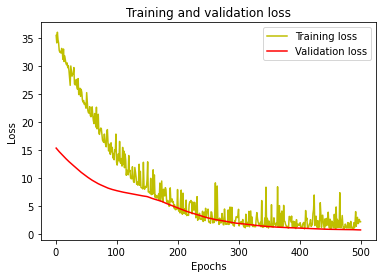

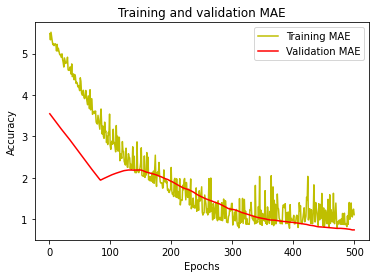

In [ ]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mean_absolute_error']
val_acc = history.history['val_mean_absolute_error']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Predicted   4.996698 real  4.15
Predicted   2.7667646 real  1.696666667
Predicted   3.599154 real  3.513333333
Predicted   7.634165 real  7.09
Predicted   3.6439228 real  4.89
Predicted   2.7810743 real  3.03
Predicted   6.5663457 real  6.856666667
Predicted   3.6439228 real  3.703333333
abs sum of loss 4.391515760421751




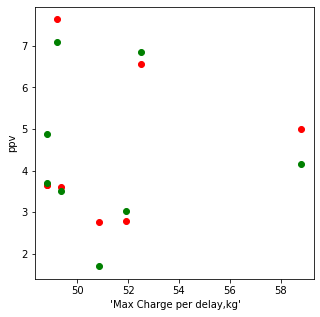

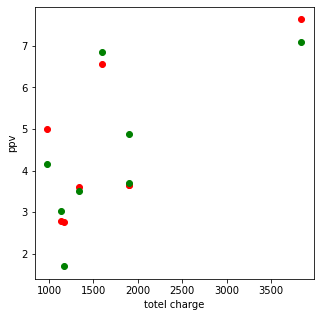

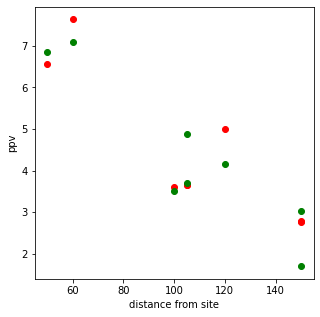

In [ ]:
import numpy as np

predictions = model.predict(X_test_scaled)
loss = []    

predictions = np.array(predictions)
predictions = predictions.flatten()

for i in range(len(predictions)):
  print("Predicted  ", predictions[i],"real ", y_test.values[i])
  loss.append(abs(y_test.values[i]-predictions[i]))
print("abs sum of loss", sum(loss))
print("\n")


fig = plt.figure(figsize =(5,5))
plt.plot(X_test.values[:,0],predictions,"o",color = "red")
plt.plot(X_test.values[:,0],y_test.values,"o",color = "green")
plt.xlabel(" 'Max Charge per delay,kg'")
plt.ylabel('ppv')
plt.show()

fig = plt.figure(figsize =(5,5))
plt.plot(X_test.values[:,1],predictions,"o",color = "red")
plt.plot(X_test.values[:,1],y_test.values,"o",color = "green")
plt.xlabel("totel charge")
plt.ylabel('ppv')
plt.show()

fig = plt.figure(figsize =(5,5))
plt.plot(X_test.values[:,2],predictions,"o",color = "red")
plt.plot(X_test.values[:,2],y_test.values,"o",color = "green")
plt.xlabel("distance from site")
plt.ylabel('ppv')
plt.show()


In [ ]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)


1/1 [==============================] - 0s 19ms/step - loss: 0.5270 - mean_absolute_error: 0.5474
Mean squared error from neural net:  0.5269834399223328
Mean absolute error from neural net:  0.5473833084106445


predictions : 4.270631622907728, real : 4.15
predictions : 1.3335497571996777, real : 1.696666667
predictions : 3.7744011166135394, real : 3.513333333
predictions : 7.238843084359196, real : 7.09
predictions : 3.7272427613247503, real : 4.89
predictions : 1.5091551349257886, real : 3.03
predictions : 7.133845880993373, real : 6.856666667
predictions : 3.7272427613247503, real : 3.703333333


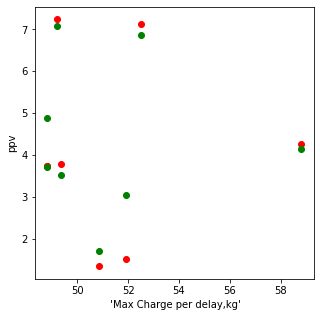

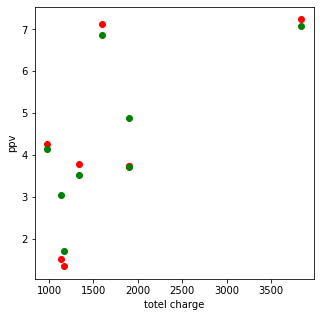

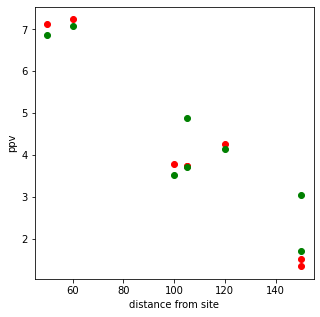

Mean squared error from linear regression:  0.49738625089722743
Mean absolute error from linear regression:  0.48479376834354626


In [ ]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Linear regression
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
predictions_reg = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, predictions_reg )
mae_lr = mean_absolute_error(y_test, predictions_reg )

predictions_reg = np.array(predictions_reg)

predictions_reg = predictions_reg.flatten()

for i in range(len(predictions_reg)):
  print(f"predictions : {predictions_reg[i]}, real : {y_test.values[i]}")


fig = plt.figure(figsize =(5,5))
plt.plot(X_test.values[:,0],predictions_reg,"o",color = "red")
plt.plot(X_test.values[:,0],y_test.values,"o",color = "green")
plt.xlabel(" 'Max Charge per delay,kg'")
plt.ylabel('ppv')
plt.show()

fig = plt.figure(figsize =(5,5))
plt.plot(X_test.values[:,1],predictions_reg,"o",color = "red")
plt.plot(X_test.values[:,1],y_test.values,"o",color = "green")
plt.xlabel("totel charge")
plt.ylabel('ppv')
plt.show()

fig = plt.figure(figsize =(5,5))
plt.plot(X_test.values[:,2],predictions_reg,"o",color = "red")
plt.plot(X_test.values[:,2],y_test.values,"o",color = "green")
plt.xlabel("distance from site")
plt.ylabel('ppv')
plt.show()

print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)


In [ ]:
tree = DecisionTreeRegressor()
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_tree)
mae_dt = mean_absolute_error(y_test, y_pred_tree)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)

Mean squared error using decision tree:  1.2975749999124995
Mean absolute error using decision tree:  0.9258333332499998


predictions : 4.511890740097221 real  4.15
predictions : 2.1749870369244446 real  1.696666667
predictions : 4.223759954163049 real  3.513333333
predictions : 6.0838157408799995 real  7.09
predictions : 3.6654570106946425 real  4.89
predictions : 2.5075055554633336 real  3.03
predictions : 7.041474074310001 real  6.856666667
predictions : 3.6654570106946425 real  3.703333333


<Figure size 360x360 with 0 Axes>

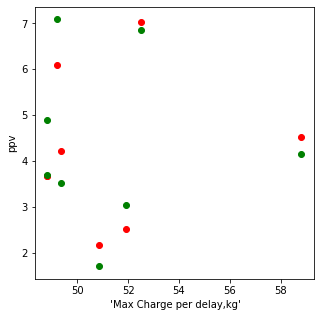

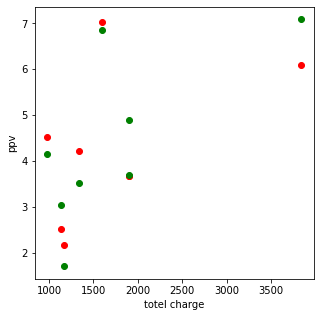

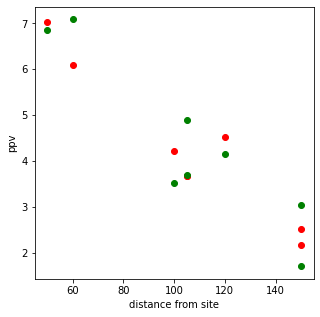

Mean squared error using Random Forest:  0.46062030027842327
Mean absolute error Using Random Forest:  0.5658178942202621


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 30, random_state=30,max_features=2,max_depth=5)
model.fit(X_train_scaled, y_train)

predictions_rf = model.predict(X_test_scaled)


  
mse_RF = mean_squared_error(y_test,predictions_rf)
mae_RF = mean_absolute_error(y_test, predictions_rf)

fig = plt.figure(figsize =(5,5))        

predictions_rf = np.array(predictions_rf)

predictions_rf = predictions_rf.flatten()

for i in range(len(predictions_rf)):
  print("predictions :" ,predictions_rf[i], "real ", y_test.values[i])

fig = plt.figure(figsize =(5,5))
plt.plot(X_test.values[:,0],predictions_rf,"o",color = "red")
plt.plot(X_test.values[:,0],y_test.values,"o",color = "green")
plt.xlabel(" 'Max Charge per delay,kg'")
plt.ylabel('ppv')
plt.show()

fig = plt.figure(figsize =(5,5))
plt.plot(X_test.values[:,1],predictions_rf,"o",color = "red")
plt.plot(X_test.values[:,1],y_test.values,"o",color = "green")
plt.xlabel("totel charge")
plt.ylabel('ppv')
plt.show()

fig = plt.figure(figsize =(5,5))
plt.plot(X_test.values[:,2],predictions_rf,"o",color = "red")
plt.plot(X_test.values[:,2],y_test.values,"o",color = "green")
plt.xlabel("distance from site")
plt.ylabel('ppv')
plt.show()

print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)